In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import os.path as osp
import numpy as np
import pickle as pkl
from scipy.signal import savgol_filter

sns.set_palette("Paired")

def plot_sns(data, xaxis='Epoch', value="AverageEpRet", condition="Condition1", label="", smooth=1, **kwargs):
    print("n_dfs:", len(data))
    print("keys:", data[0].keys())
    if smooth > 1:
        y = np.ones(smooth)
        for datum in data:
            x = np.asarray(datum[value])
            z = np.ones(len(x))
            smoothed_x = np.convolve(x,y,'same') / np.convolve(z,y,'same')
            datum[value] = smoothed_x

    if isinstance(data, list):
        data = pd.concat(data, ignore_index=True)
    # sns.set(style="darkgrid", font_scale=1.5)
    sns.lineplot(data=data, x=xaxis, y=value, errorbar='se', **kwargs)

In [5]:
def plot_results(path:str, yaxis:str, label:str=None, best:int=None, xaxis:str='epoch'):
    def get_steps_vecs(ep_lens):
        step_vec = []
        current_step = 0
        for ep_len in ep_lens:
            current_step += ep_len
            step_vec.append(current_step)
        return step_vec
        
    if label==None:
        label = path.split('/')[-1].split('.')[-2]
    data = pkl.load(open(path,"rb"))
    if xaxis == 'epoch':
        x_vectors = [np.arange(len(data["results"][0][yaxis]))]*len(data["results"])
    elif xaxis == 'step':
        x_vectors = [get_steps_vecs(res["episode_length"]) for res in data["results"]]
    if best:
        avg_avg_returns = [np.mean(res[yaxis]) for res in data["results"]]
        idxes = np.argsort(avg_avg_returns)[-best:]
    else:
        idxes = np.arange(len(data["results"]))
    plot_sns(
        data=[pd.DataFrame({xaxis:x_vectors[i], yaxis:data["results"][i][yaxis]}) for i in idxes],
        xaxis=xaxis,
        value=yaxis,
        smooth=5,
        label=label,
    )

[     epoch  episode_return
0        0       13.333333
1        1       18.333333
2        2       13.333333
3        3       14.666667
4        4       11.666667
..     ...             ...
245    245      180.333333
246    246      200.000000
247    247      153.000000
248    248      153.666667
249    249      200.000000

[250 rows x 2 columns],      epoch  episode_return
0        0       27.333333
1        1       12.000000
2        2       13.666667
3        3       22.000000
4        4       24.000000
..     ...             ...
245    245      200.000000
246    246      191.333333
247    247      196.333333
248    248      173.666667
249    249      200.000000

[250 rows x 2 columns],      epoch  episode_return
0        0       10.666667
1        1       17.666667
2        2       19.000000
3        3       25.666667
4        4       23.333333
..     ...             ...
245    245      199.666667
246    246      185.000000
247    247      164.666667
248    248      200.000000
249 

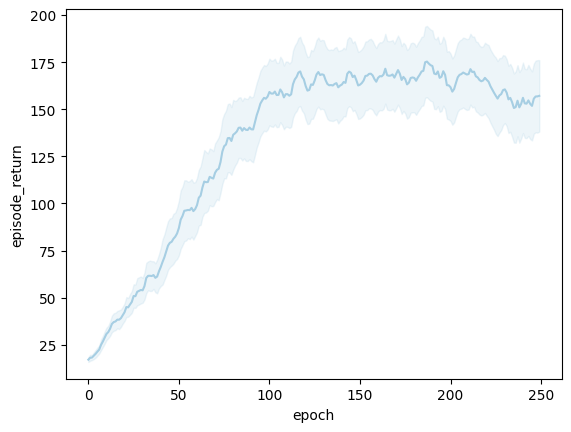

In [6]:
# data=pkl.load(open("sample.pkl","rb"))
# print(data.keys())
# print(data["params"])
plot_results("sample.pkl", "episode_return", label="REINFORCE1", best=None)

(0.0, 220.0)

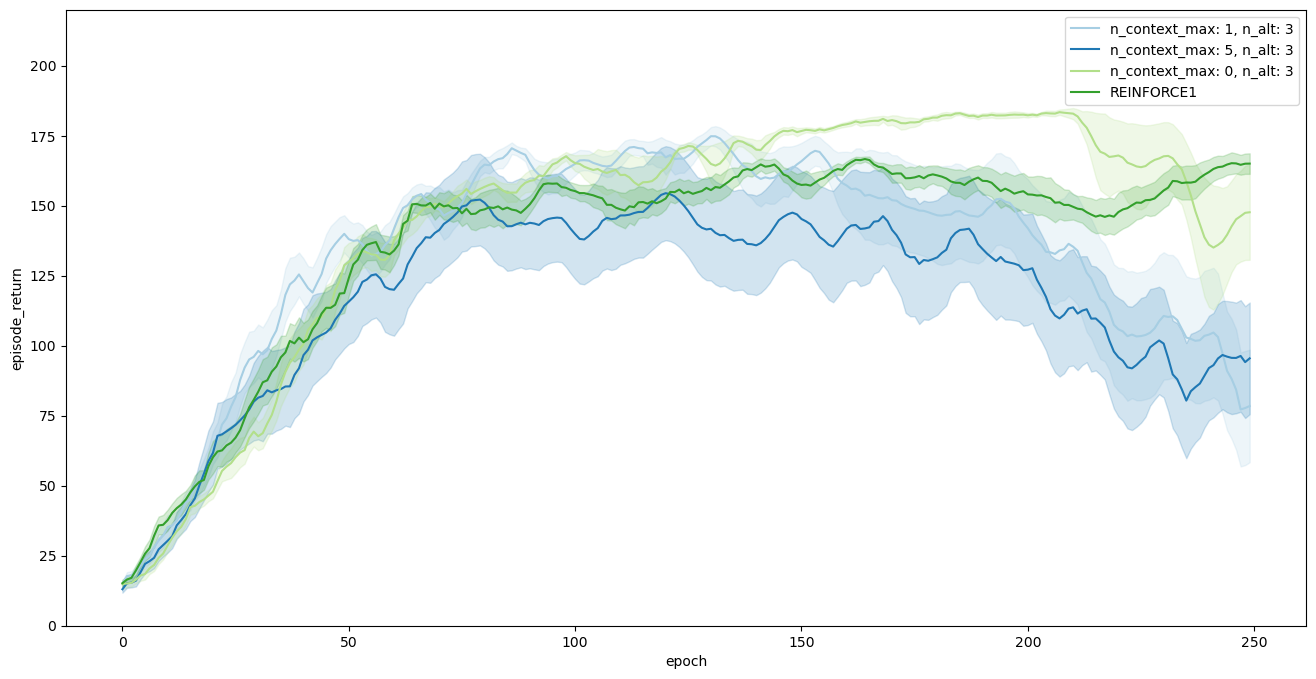

In [7]:
best=10
root_dir = "experiments/cartpole_v6_2_alt_act_later_kickin"

# latent_sizes = [4, 8] choose better
# v_iterss = [1, 10, 50] choose better
# pi_iterss = [1, 50] choose better

# n_alternative_actionss = [0, 5]
# n_context_maxs = [0, 1, 5]  # unconditional, onlylast, cnp style respectively
plt.figure(figsize=(16,8))
i = 0

for file in os.listdir(root_dir):
    fpath = osp.join(root_dir, file)
    # open the file
    data = pkl.load(open(fpath, "rb"))
    params = data["params"]
    # if params["n_alternates"]!=5:
    #     continue
    # if params["n_context_max"] != 5:
    #     continue
    if data["env_config"]["prob"]!=0.0:
        continue
    # label="latent_size: {}, v_iters: {}, pi_iters: {}".format(params["encoder_output_size"], params["v_iters"], params["pi_iters"])
    # label=f'{params["encoder_output_size"]:<5} | {params["v_iters"]:<5} | {params["pi_iters"]:<5}'
    label="n_context_max: {}, n_alt: {}".format(params["n_context_max"], params["n_alternates"])

    plot_results(osp.join(root_dir, file), "episode_return",label=label, xaxis="epoch", best=best)
    # i=i+1
    # if i==10:
    #     break

plot_results("experiments/reinforce_continuous_cartpole_noisy_contRew_noise0.0.pkl", "episode_return", label="REINFORCE1", best=best)

# plt.legend(fontsize='11', loc='upper left')
# plt.xlim([0,250])
plt.ylim([0,220])


In [7]:
data=pkl.load(
    open(
        "experiments/reinforce_w_valuenet.pkl",
        "rb"
    )
)

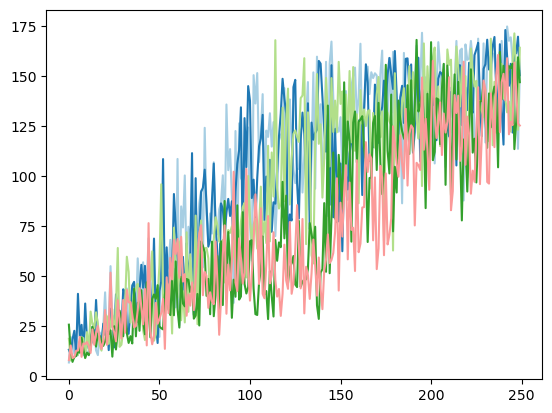

In [10]:
plt.figure()
for d in data:
    plt.plot(d["episode_return"])

In [12]:
data=pkl.load(
    open("experiments/reinforce_w_valuenet_continuous_cartpole_noisy_contRew_noVelocity.pkl", "rb")
)

In [17]:
data2={}
data2["results"] = data

In [18]:
pkl.dump(
    data2,
    open("experiments/reinforce_w_valuenet_continuous_cartpole_noisy_contRew_noVelocity.pkl", "wb")
)